In [139]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions # for plotting deciison boundaries
import seaborn as sns

In [140]:
df=pd.DataFrame()

In [141]:
df['feature1']=[1,2,3,4,5,6,6,7,9,9]
df['feature2']=[5,3,6,8,1,9,5,8,9,2]
df['target']=[1,1,0,1,0,1,0,1,0,0]
df

feature1  feature2  target
0         1         5       1
1         2         3       1
2         3         6       0
3         4         8       1
4         5         1       0
5         6         9       1
6         6         5       0
7         7         8       1
8         9         9       0
9         9         2       0

In [142]:
df.shape

(10, 3)

<Axes: xlabel='feature1', ylabel='feature2'>

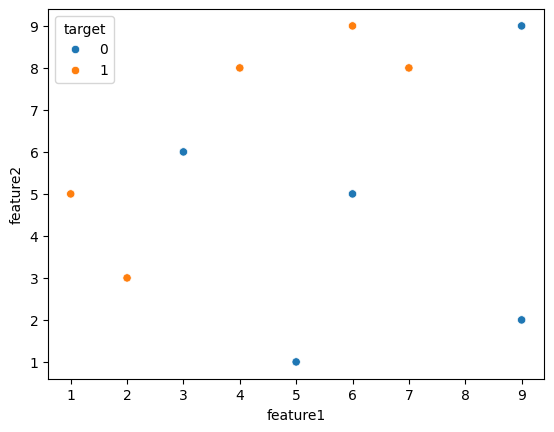

In [143]:
# relationship between given features
sns.scatterplot(x=df['feature1'],y=df['feature2'],hue=df['target'])


In [144]:
# Initialize the weights
df['weights0']=1/df.shape[0]


In [145]:
df

feature1  feature2  target  weights0
0         1         5       1       0.1
1         2         3       1       0.1
2         3         6       0       0.1
3         4         8       1       0.1
4         5         1       0       0.1
5         6         9       1       0.1
6         6         5       0       0.1
7         7         8       1       0.1
8         9         9       0       0.1
9         9         2       0       0.1

In [146]:
# Train the weak model (decision stump)
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=1) # one level


In [147]:
features=df[['feature1','feature2']]
target=df['target']

In [148]:
# model training: M1
dt1.fit(features,target)

DecisionTreeClassifier(max_depth=1)

In [149]:
target_pred1=dt1.predict(features)

In [150]:
df['target_pred1']=target_pred1

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

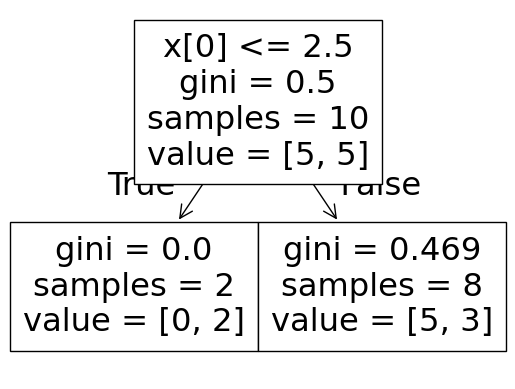

In [151]:
from sklearn.tree import plot_tree
plot_tree(dt1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

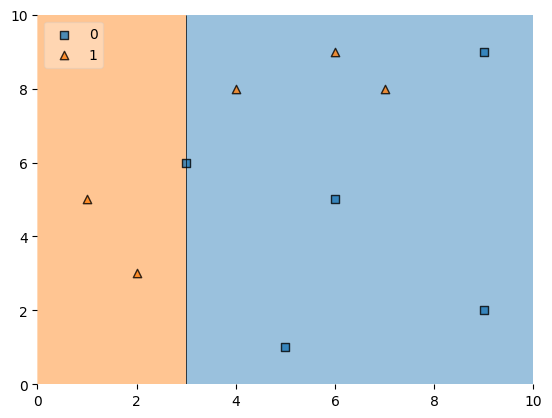

In [152]:
plot_decision_regions(np.array(features),np.array(target),clf=dt1,legend=2)

# 3 misclassified points

In [153]:
df # mis classified points can  be seen from here

#3 points are misclassified
 # so total error=0.3

feature1  feature2  target  weights0  target_pred1
0         1         5       1       0.1             1
1         2         3       1       0.1             1
2         3         6       0       0.1             0
3         4         8       1       0.1             0
4         5         1       0       0.1             0
5         6         9       1       0.1             0
6         6         5       0       0.1             0
7         7         8       1       0.1             0
8         9         9       0       0.1             0
9         9         2       0       0.1             0

In [154]:
# alculate alpha

def alpha(error): # model's weight
    if error==0: # if error is 0 , alpha should be infinity (very high)
      return 1e10
    return 0.5*np.log((1-error)/error)

error=0.3
alpha1=alpha(error)

In [155]:
alpha1

0.42364893019360184

In [156]:
# update the weights of correctly and misclassified points

def update_weights(dataframe, alpha,obtained_target,previous_weights_number,current_weights_number):
    dataframe['weights'+str(current_weights_number)] = np.where(
        dataframe['target'] == dataframe[obtained_target],
        dataframe['weights'+str(previous_weights_number)] * np.exp(-alpha),
        dataframe['weights'+str(previous_weights_number)] * np.exp(alpha)
    )


update_weights(df, alpha1, 'target_pred1',0,1)

In [157]:
df

feature1  feature2  target  weights0  target_pred1  weights1
0         1         5       1       0.1             1  0.065465
1         2         3       1       0.1             1  0.065465
2         3         6       0       0.1             0  0.065465
3         4         8       1       0.1             0  0.152753
4         5         1       0       0.1             0  0.065465
5         6         9       1       0.1             0  0.152753
6         6         5       0       0.1             0  0.065465
7         7         8       1       0.1             0  0.152753
8         9         9       0       0.1             0  0.065465
9         9         2       0       0.1             0  0.065465

In [158]:
df

feature1  feature2  target  weights0  target_pred1  weights1
0         1         5       1       0.1             1  0.065465
1         2         3       1       0.1             1  0.065465
2         3         6       0       0.1             0  0.065465
3         4         8       1       0.1             0  0.152753
4         5         1       0       0.1             0  0.065465
5         6         9       1       0.1             0  0.152753
6         6         5       0       0.1             0  0.065465
7         7         8       1       0.1             0  0.152753
8         9         9       0       0.1             0  0.065465
9         9         2       0       0.1             0  0.065465

In [159]:
# normalize the weights
def normalize_weights(dataframe,current_weights_number):
    dataframe['weights'+str(current_weights_number)] = dataframe['weights'+str(current_weights_number)] / dataframe['weights'+str(current_weights_number)].sum()

normalize_weights(df,1)

In [160]:
df

feature1  feature2  target  weights0  target_pred1  weights1
0         1         5       1       0.1             1  0.071429
1         2         3       1       0.1             1  0.071429
2         3         6       0       0.1             0  0.071429
3         4         8       1       0.1             0  0.166667
4         5         1       0       0.1             0  0.071429
5         6         9       1       0.1             0  0.166667
6         6         5       0       0.1             0  0.071429
7         7         8       1       0.1             0  0.166667
8         9         9       0       0.1             0  0.071429
9         9         2       0       0.1             0  0.071429

In [161]:
# lower and upper bound of the normalized weights
df['cumsum_upper']=np.cumsum(df['weights1'])
df['cumsum_lower']=df['cumsum_upper']-df['weights1']


In [162]:
df # for miscalssified points, the range is high (upper -lower)

feature1  feature2  target  weights0  target_pred1  weights1  cumsum_upper  \
0         1         5       1       0.1             1  0.071429      0.071429   
1         2         3       1       0.1             1  0.071429      0.142857   
2         3         6       0       0.1             0  0.071429      0.214286   
3         4         8       1       0.1             0  0.166667      0.380952   
4         5         1       0       0.1             0  0.071429      0.452381   
5         6         9       1       0.1             0  0.166667      0.619048   
6         6         5       0       0.1             0  0.071429      0.690476   
7         7         8       1       0.1             0  0.166667      0.857143   
8         9         9       0       0.1             0  0.071429      0.928571   
9         9         2       0       0.1             0  0.071429      1.000000   

   cumsum_lower  
0      0.000000  
1      0.071429  
2      0.142857  
3      0.214286  
4      0.380952  
5      0.452381  
6      0.619048  
7      0.690476  
8      0.857143  
9      0.928571

In [163]:
# let's start iteration-2

def create_weighted_data(df):
  indeces=[]
  for i in range(df.shape[0]):
    a=np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_lower']<a and a<row['cumsum_upper']:
        indeces.append(index)
  return indeces

In [164]:
index_values=create_weighted_data(df)
index_values

[8, 2, 0, 7, 8, 6, 0, 4, 4, 8]

In [165]:
df2=df.iloc[index_values,[0,1,2,3]]
df2

feature1  feature2  target  weights0
8         9         9       0       0.1
2         3         6       0       0.1
0         1         5       1       0.1
7         7         8       1       0.1
8         9         9       0       0.1
6         6         5       0       0.1
0         1         5       1       0.1
4         5         1       0       0.1
4         5         1       0       0.1
8         9         9       0       0.1

In [166]:
dt2=DecisionTreeClassifier(max_depth=1)
features=df2[['feature1','feature2']]
target=df2['target']
dt2.fit(features,target)

DecisionTreeClassifier(max_depth=1)

In [167]:
target_pred2=dt2.predict(features)

In [168]:
df2['target_pred2']=target_pred2

In [169]:
df2

feature1  feature2  target  weights0  target_pred2
8         9         9       0       0.1             0
2         3         6       0       0.1             0
0         1         5       1       0.1             1
7         7         8       1       0.1             0
8         9         9       0       0.1             0
6         6         5       0       0.1             0
0         1         5       1       0.1             1
4         5         1       0       0.1             0
4         5         1       0       0.1             0
8         9         9       0       0.1             0

In [170]:
df2['diff']=df2['target']-df2['target_pred2']

In [171]:
df2 # 1 datapoint is misclassified

feature1  feature2  target  weights0  target_pred2  diff
8         9         9       0       0.1             0     0
2         3         6       0       0.1             0     0
0         1         5       1       0.1             1     0
7         7         8       1       0.1             0     1
8         9         9       0       0.1             0     0
6         6         5       0       0.1             0     0
0         1         5       1       0.1             1     0
4         5         1       0       0.1             0     0
4         5         1       0       0.1             0     0
8         9         9       0       0.1             0     0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

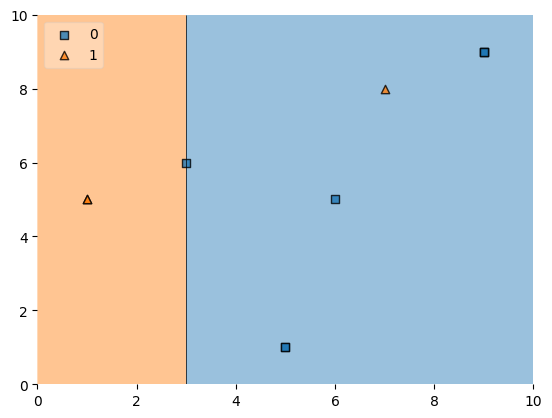

In [172]:
plot_decision_regions(np.array(features),np.array(target),clf=dt2,legend=2)


In [124]:
df2.drop('diff',axis=1,inplace=True)
df2

feature1  feature2  target  weights0  target_pred2
8         9         9       0       0.1             0
1         2         3       1       0.1             1
8         9         9       0       0.1             0
0         1         5       1       0.1             1
7         7         8       1       0.1             1
9         9         2       0       0.1             0
0         1         5       1       0.1             1
9         9         2       0       0.1             0
3         4         8       1       0.1             1
5         6         9       1       0.1             1

In [127]:
error=0.0
alpha2=alpha(error)

In [128]:
alpha2

10000000000.0

In [ ]:
# we can still continue the process like updating weights, normalize,new weighted dataset, again training etc

In [129]:
df

feature1  feature2  target  weights0  target_pred1  weights1  cumsum_upper  \
0         1         5       1       0.1             1  0.071429      0.071429   
1         2         3       1       0.1             1  0.071429      0.142857   
2         3         6       0       0.1             0  0.071429      0.214286   
3         4         8       1       0.1             0  0.166667      0.380952   
4         5         1       0       0.1             0  0.071429      0.452381   
5         6         9       1       0.1             0  0.166667      0.619048   
6         6         5       0       0.1             0  0.071429      0.690476   
7         7         8       1       0.1             0  0.166667      0.857143   
8         9         9       0       0.1             0  0.071429      0.928571   
9         9         2       0       0.1             0  0.071429      1.000000   

   cumsum_lower  
0      0.000000  
1      0.071429  
2      0.142857  
3      0.214286  
4      0.380952  
5      0.452381  
6      0.619048  
7      0.690476  
8      0.857143  
9      0.928571

In [179]:
# original data

df=pd.DataFrame()
df['feature1']=[1,2,3,4,5,6,6,7,9,9]
df['feature2']=[5,3,6,8,1,9,5,8,9,2]
df['target']=[1,1,0,1,0,1,0,1,0,0]
features=df[['feature1','feature2']]
target=df['target']

In [182]:
# final model
data=np.array(features)
final_target = np.sign(alpha1 * dt1.predict(data) + alpha2 * dt2.predict(data))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [183]:
final_target

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])